In [248]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('data/train.csv', nrows = 10000, index_col = 0)

n_days = 1099
days_in_week = 7
n_weeks = n_days // days_in_week
if (n_days % days_in_week != 0): n_weeks += 1

# For 1st consumer

## Without weights (algorithm 0.1)
Read data for 1 customer

In [249]:
f = open('data/train.csv')
f.readline()
line = f.readline()
ind, line = line.split(',')
ind = str(ind)
line = line.strip()
visits = [int(s) for s in line.split(' ')];
visits

[30,
 84,
 126,
 135,
 137,
 179,
 242,
 342,
 426,
 456,
 460,
 462,
 483,
 594,
 600,
 604,
 704,
 723,
 744,
 787,
 804,
 886,
 924,
 928,
 946,
 954,
 1039,
 1040,
 1052]

Make matrix of visits of customer

In [250]:


def make_visit_matrix(visits):
    V = np.zeros(shape = (n_weeks, 7), dtype = int)
    for day in visits:
#         print("day = ", day, ', week = ', (day-1) // 7, ", day = ", (day-1)%7)
        V[(day-1) // 7, (day-1)%7] = 1
    
    V = pd.DataFrame(V, columns=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    V.index = V.index + 1
    return V
    
V = make_visit_matrix(visits)


Drop empty weeks, leave last week for testing

In [263]:
for i in V.index:
    if (not np.any(V.loc[i,:])):
        V = V.drop(i)
print(V.shape)
V_test = V.iloc[0]
V = V.iloc[0:]
n_weeks -= 1
(visits[0] - 1)%7
#{30: 1, 84: 2, 126: 3, 135: 4, 137: 4, 179: 5, 242: 6, 342: 7, 426: 8, 456: 9, 460: 9, 462: 9, 483: 10, 594: 11, 600: 11,

(25, 7)


1

In [252]:
{30: 1, 84: 2, 126: 3, 135: 4, 137: 4, 179: 5, 242: 6, 342: 7, 426: 8, 456: 9, 460: 9, 462: 9, 483: 10, 594: 11, 600: 11, 604: 12, 704: 13, 723: 14, 744: 15, 787: 16, 804: 17, 886: 18, 924: 19, 928: 19, 946: 20, 954: 21, 1039: 22, 1040: 22, 1052: 23}

{30: 1,
 84: 2,
 126: 3,
 135: 4,
 137: 4,
 179: 5,
 242: 6,
 342: 7,
 426: 8,
 456: 9,
 460: 9,
 462: 9,
 483: 10,
 594: 11,
 600: 11,
 604: 12,
 704: 13,
 723: 14,
 744: 15,
 787: 16,
 804: 17,
 886: 18,
 924: 19,
 928: 19,
 946: 20,
 954: 21,
 1039: 22,
 1040: 22,
 1052: 23}

Count probabilities p_i - probability, that consumer will visit the shop in i-th day.
 (Для кожного дня і це ймовірності схеми Бернуллі - випробуванням є кожен тиждень, а успіх - якщо того тижня відвідувач приходив і-го дня. Сума не обов'язково рівна 1)

In [253]:
p = V.sum().to_numpy() / V.shape[0]

Count probabilities of first visit

In [254]:
p_ = np.zeros(7)
for i in range(7):
    p_[i] = (1 - p[:i]).prod() * p[i]

# check
print(p_.sum() + (1 - p).prod()) # = 1

1.0


Prediction

In [255]:
predicted_day = np.argmax(p_)
predicted_day;

## With weights (algorithm 1.0)

In [256]:
d_cur = visits[0]
num_of_week = {d_cur : 1}
n_weeks = 1
for d in visits[1:]:
    # if not at the same week
    if not((d - d_cur) < 7 and ((d - 1)%7 - (d_cur - 1)%7)) > 0:
        n_weeks += 1
        d_cur = copy(d)
    num_of_week[d] = n_weeks
print("n_weeks =", n_weeks)
print(num_of_week)
print((num_of_week.values()))

n_weeks = 25
{30: 1, 84: 2, 126: 3, 135: 4, 137: 4, 179: 5, 242: 6, 342: 7, 426: 8, 456: 9, 460: 9, 462: 9, 483: 10, 594: 11, 600: 12, 604: 13, 704: 14, 723: 15, 744: 16, 787: 17, 804: 18, 886: 19, 924: 20, 928: 21, 946: 22, 954: 23, 1039: 24, 1040: 24, 1052: 25}
dict_values([1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25])


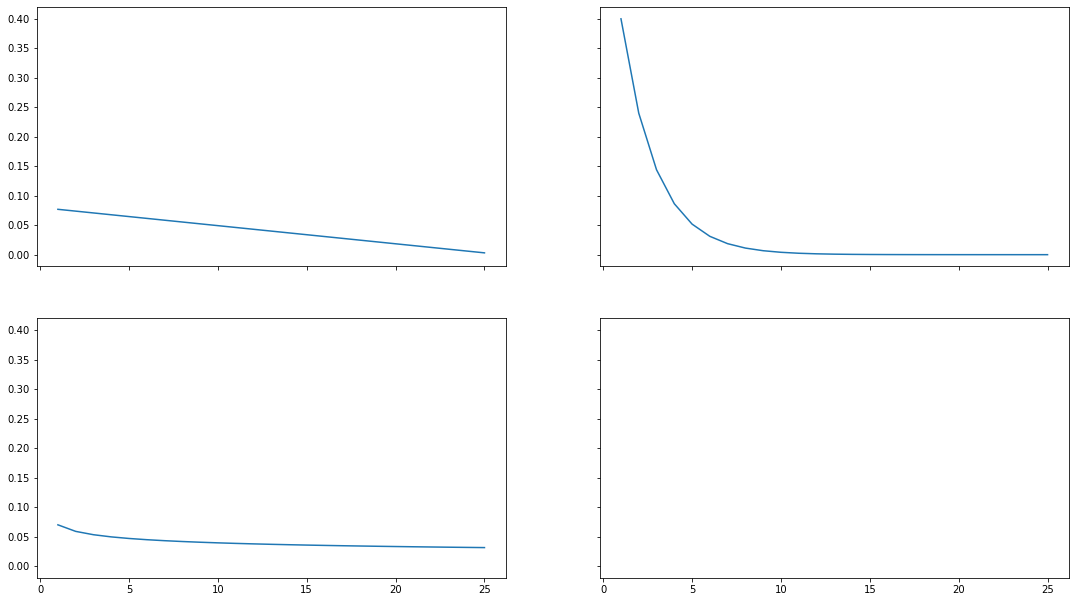

In [257]:


#---------------
weeks = range(1, n_weeks+1)

w_lin = np.array([(n_weeks - i + 1)/n_weeks for i in weeks])
w_lin = w_lin / w_lin.sum()

lambd = 0.6
w_exp = np.array([lambd**(i) for i in weeks])
w_exp = w_exp / w_exp.sum()

gamma = 0.25
w_recip = np.array([1/i**(gamma) for i in weeks])
w_recip = w_recip / w_recip.sum()

#plotting of three profiles of weights
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(18.5, 10.5, forward=True)
ax[0, 0].plot(weeks, w_lin)
ax[0, 1].plot(weeks, w_exp)
ax[1, 0].plot(weeks, w_recip);

Count weighted probabilities p and p_

In [258]:
w = w_lin
print(num_of_week)
for i in range(V.shape[0]):
    V.iloc[i] *= w[i]

    
p = V.sum(axis=0)
p_ = np.zeros(7)
for i in range(7):
    p_[i] = (1 - p[:i]).prod() * p[i]

# check
print(p_.sum() + (1 - p).prod()) # == 1
p


{30: 1, 84: 2, 126: 3, 135: 4, 137: 4, 179: 5, 242: 6, 342: 7, 426: 8, 456: 9, 460: 9, 462: 9, 483: 10, 594: 11, 600: 12, 604: 13, 704: 14, 723: 15, 744: 16, 787: 17, 804: 18, 886: 19, 924: 20, 928: 21, 946: 22, 954: 23, 1039: 24, 1040: 24, 1052: 25}
1.0000000000000002


Mon    0.064615
Tue    0.261538
Wed    0.033846
Thu    0.273846
Fri    0.095385
Sat    0.184615
Sun    0.264615
dtype: float64

Predict

In [15]:
predicted_day = np.argmax(p_)
predicted_day;

## Evaluation

In [16]:
# from numpy.random import default_rng
# rng = default_rng(142)
# index_random = rng.permutation(V.index)
# test_proportion = 0.25
# n_test = int(np.floor(test_proportion * len(V.index)))
# V_test, V_train = V.loc[index_random[:n_test]], V.loc[index_random[n_test:]]



In [17]:
# test_proportion = 0.25
# n_test = int(np.floor(test_proportion * len(V.index)))

# V_test, V_train = V.iloc[-n_test:, :], V.iloc[:-n_test, :]

In [18]:
def is_true_prediction(V_test, predicted_day):
    return (V_test.iloc[predicted_day] == 1) and (V_test.iloc[:predicted_day].sum() == 0)


# For all consumers

In [105]:
# def parse_visits(ind):
df.loc[1][0]

' 30 84 126 135 137 179 242 342 426 456 460 462 483 594 600 604 704 723 744 787 804 886 924 928 946 954 1039 1040 1052'

In [148]:
def parse_visits(ind):
    line = df.loc[ind][0]
    line = line.strip()
    visits = [int(s) for s in line.split(' ')]
    return visits
    
visits = parse_visites(1);

In [169]:
n_weeks = n_days // days_in_week
if (n_days % days_in_week != 0): n_weeks += 1
print("weeks: ", n_weeks)

def make_visit_matrix(visits):       
    
    V = np.zeros(shape = (n_weeks, 7), dtype = int)
    for day in visits:
        V[(day-1) // 7, (day-1) % 7] = 1
    V = pd.DataFrame(V, columns=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    V.index = V.index + 1
    return V.iloc[:-1], V.iloc[-1]
    
    
V, V_test = make_visit_matrix(visits)
n_weeks -= 1
V.shape, V_test.shape
V.head()

weeks:  157


,Mon,Tue,Wed,Thu,Fri,Sat,Sun
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0


In [170]:
def drop_empty_weeks(V):
    for i in V.index:
        if (not np.any(V.loc[i,:])):
            V = V.drop(i)
    return V

V = drop_empty_weeks(V)

In [171]:
def get_weights(length=n_weeks, choose='lin'):
    weeks = range(1, length+1)
    if (choose == 'lin'):
        w_lin = np.array([(length - i + 1)/n_weeks for i in weeks])
        w_lin = w_lin / w_lin.sum()
        return w_lin
    elif (choose == 'exp'):
        lambd = 0.985
        w_exp = np.array([lambd**(i) for i in weeks])
        w_exp = w_exp / w_exp.sum()
        return w_exp
    elif (choose == 'recip'):
        gamma = 0.25
        w_recip = np.array([1/i**(gamma) for i in weeks])
        w_recip = w_recip / w_recip.sum()
        return w_recip
    
    


In [173]:


# print(w)
def compute_p(w):
    w_sum = 0
    p = np.zeros(7)
    for ind in V.index:
        p += V.loc[ind, :] * w[ind - 1]
        w_sum += w[ind - 1]
    p /= w_sum
    return p
    
# print(p)    
p = compute_p(w)   
def compute_p_(p):
    p_ = np.zeros(7)
    p_[0] = p[0]
    p_negative = 1
    for i in range(1, days_in_week):
        p_negative *= (1 - p[i-1])
        p_[i] = p_negative * p[i]
    return p_



p_ = compute_p_(p)
# check
# print(p_.sum() + (1 - p).prod()) # == 1
print(p_)  # p_ = array([4.28141882e-27, 2.96942355e-28, 4.19505139e-28, 1.89778664e-28,
     #  1.51950102e-31, 2.00812615e-27, 1.90747765e-30])
    
p

IndexError: single positional indexer is out-of-bounds

In [153]:
def predict(p_):
    return np.argmax(p_)

predicted_day = predict(p_)

In [98]:
def is_true_prediction(V_test, predicted_day):
    return (V_test.iloc[predicted_day] == 1) and (V_test.iloc[:predicted_day].sum() == 0)



# Select customers with old visits

In [54]:
# days = np.arange(1, n_days+1)

def plot_visit_history(ind):
    visits = parse_visits(ind)
    binwidth = 20
    plt.hist(visits, bins=range(min(visits), max(visits) + binwidth, binwidth));
    plt.axvline(np.median(visits), color='red')


In [81]:
old_ind = []
for ind in df.index:
    visites = parse_visites(ind)
    if (np.median(visites) > n_days*0.7):
        old_ind.append(ind)
        
young_ind = []
for ind in df.index:
    visites = parse_visites(ind)
    if (np.median(visites) < n_days*0.3):
        young_ind.append(ind)
young_ind

[87,
 378,
 821,
 933,
 1303,
 1547,
 1710,
 1945,
 2184,
 2829,
 2950,
 3331,
 3382,
 3467,
 5279,
 5992,
 8802,
 10676,
 12447,
 12702,
 14199,
 22952,
 25680,
 33667,
 35493,
 36439,
 36583,
 40644,
 41068,
 58694,
 97376]

old visitors [3, 22, 86, 726, 748, 956, 1367, 1675]


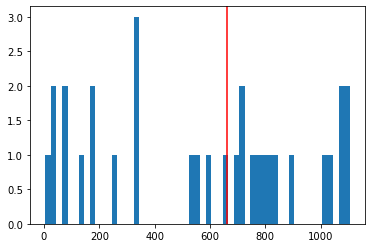

In [65]:
print("old visitors", old_ind)
# visites = parse_visites(3)
plot_visit_history(14)


In [66]:
df.loc[old_ind]

,visits
id,
3,51 143 173 257 446 491 504 510 559 616 719 73...
22,41 51 122 186 235 304 349 528 532 545 647 685...
86,53 73 124 149 167 211 305 415 470 515 551 642...
726,116 193 263 291 298 328 389 406 444 445 467 5...
748,2 99 127 128 151 194 215 216 245 439 441 464 ...
956,62 163 265 269 332 360 369 374 422 501 514 51...
1367,77 95 158 221 238 252 325 349 353 471 472 481...
1675,26 109 130 163 199 339 346 368 396 434 439 47...


# Experiments: fast algorithm

In [179]:
from copy import copy
visits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(visits)
d_cur = visits[0]
num_of_week = {d_cur : 1}
n_weeks = 1
for d in visits[1:]:
    # if not at the same week
    if not((d - d_cur) < 7) and (d - 1 % 7) - (d_cur - 1 % 7) > 0:
        n_weeks += 1
        d_cur = copy(d)
    num_of_week[d] = n_weeks
print("n_weeks =", n_weeks)
print(num_of_week)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_weeks = 2
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2}


In [260]:

weeks = range(1, n_weeks+1)
w = np.array([(n_weeks - i + 1)/n_weeks for i in weeks])
print("w.sum() = ",w.sum())
w = w / w.sum()

p = np.zeros(days_in_week)
for day in visits:
    day_in_week = (day-1)%days_in_week + 1
    w_i = w[num_of_week[day] - 1]
    p[day_in_week - 1] += w_i
#     print("day = ", day, ", day_in_week =", day_in_week, ", num_of_week = ", num_of_week[day], ", w_i = ", w_i)
    
print("w_sum =",w.sum())
print("p =", p)
# p = [0.06461538 0.26153846 0.03384615 0.27384615 0.09538462 0.18461538
#  0.26461538]

w.sum() =  12.999999999999998
w_sum = 1.0
p = [0.06461538 0.26153846 0.03384615 0.27384615 0.09538462 0.18461538
 0.26461538]
